In [3]:
from embeddingsModule.generateEmbeddings import BERTEmbeddingsGenerator

texts = [
        "bank", "he eventually sold the shares back to the bank at a premium.", 
        "the bank strongly resisted cutting interest rates."
        # Add more sentences 
    ]

    # choose your output directory in order to save your embeddings
output_directory = 'embeddings_stored'
    
embeddings_generator = BERTEmbeddingsGenerator()
embeddings_generator.generate_embeddings(texts, output_directory)

### t-SNE algorithm

Implementing t-SNE (t-Distributed Stochastic Neighbor Embedding) for visualizing BERT embeddings involves several steps. t-SNE is commonly used to reduce high-dimensional data into a lower-dimensional space (usually 2D or 3D) while preserving the local structure of the data points as much as possible.

Embeddings Shape: (13, 768)
Encoded Labels Shape: (13,)


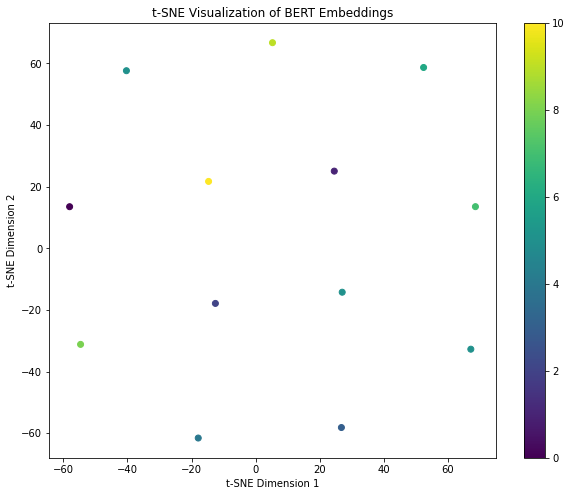

In [23]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Load .tsv differently
tsv_embeddings = 'embeddings_stored/embeddings.tsv'
tsv_metadata = 'embeddings_stored/metadata.tsv'

# Load embeddings and labels
bert_embeddings = np.loadtxt(tsv_embeddings, delimiter='\t')
# Sample metadata labels
metadata_labels = [
    'bank', 'eventually', 'sold', 'shares', 'back', 
    'bank', 'premium', 'bank', 'strongly', 'resisted', 
    'cutting', 'interest', 'rates'
]

# Create a dictionary to map labels to numerical values
label_map = {label: i for i, label in enumerate(set(metadata_labels))}
encoded_labels = np.array([label_map[label] for label in metadata_labels])

# Check shapes
print("Embeddings Shape:", bert_embeddings.shape)
print("Encoded Labels Shape:", encoded_labels.shape)

# Define the algorithm with reduced perplexity
perplexity = min(30, bert_embeddings.shape[0] - 1)  # Adjust to a reasonable value
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
tsne_embeddings = tsne.fit_transform(bert_embeddings)

# Visualize t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=encoded_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of BERT Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
